### 1. Loading and Preprocessing

In [715]:
import pandas as pd

#### Load the dataset and perform necessary preprocessing steps.

##### Step 1: Load the Dataset

In [717]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#####  Step 2: Initial Exploration and Cleanup

In [719]:
df.describe()

# Check for null values and data types
df.info()

# Check for duplicated rows
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.lower().str.strip()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [721]:
distinctCarName = df["carname"].unique()
print(distinctCarName)

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

##### Step 3: Clean and Extract Car Brand

In [723]:
# Seperate and Extract car brand and model values and convert to lower.
df['carbrand'] = df['carname'].apply(lambda x: x.split()[0].lower())
df['carmodel'] = df['carname'].apply(lambda x: ' '.join(x.split()[1:]))

df['carbrand'].str.lower()
df['carmodel'].str.lower()

string_cols = ['carname', 'carbrand', 'carmodel']
df[string_cols] = df[string_cols].apply(lambda x: x.str.lower())

df.drop('carname', axis=1, inplace=True)

In [725]:
distinctCarBrands = df["carbrand"].unique()
print(distinctCarName)

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

In [394]:
distinctCarNames = df["carmodel"].unique()
print(distinctCarNames)

['giulia' 'stelvio' 'quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'mu-x' 'd-max' 'd-max v-cross' 'xj'
 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc' 'rx-7 gs'
 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'skylark'
 'century special' 'regal sport coupe (turbo)' 'cougar' 'mirage' 'lancer'
 'outlander' 'g4' 'mirage g4' 'montero' 'pajero' 'versa' 'gt-r' 'rogue'
 'latio' 'titan' 'leaf' 'juke' 'note' 'clipper' 'nv200' 'dayz' 'fuga'
 'otti' 'teana' 'kicks' '504' '304' '504 (sw)' '604sl' '505s turbo diesel'
 'fury iii' 'cricket' 'satellite custom (sw)' 'fury gran sedan' 'valiant'


In [727]:
# correct misspelled brand names
df['carbrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'nissan': 'nissan',
    'maxda': 'mazda',
    'Nissan': 'nissan'
}, inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10176\2089305095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['carbrand'].replace({


In [729]:
filtered = df[df["carbrand"] == "nissan"]

In [731]:
print(filtered)

     car_id  symboling fueltype aspiration doornumber    carbody drivewheel  \
89       90          1      gas        std        two      sedan        fwd   
90       91          1   diesel        std        two      sedan        fwd   
91       92          1      gas        std        two      sedan        fwd   
92       93          1      gas        std       four      sedan        fwd   
93       94          1      gas        std       four      wagon        fwd   
94       95          1      gas        std        two      sedan        fwd   
95       96          1      gas        std        two  hatchback        fwd   
96       97          1      gas        std       four      sedan        fwd   
97       98          1      gas        std       four      wagon        fwd   
98       99          2      gas        std        two    hardtop        fwd   
99      100          0      gas        std       four  hatchback        fwd   
100     101          0      gas        std       fou

##### Step 4: Convert Categorical Variables

In [733]:
# Convert 'doornumber' strings to actual numbers
df["doornumber"].replace({'two': 2, 'four': 4})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10176\888511066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["doornumber"].replace({'two': 2, 'four': 4})


0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumber, Length: 205, dtype: int64

In [735]:
# Convert categorical variables using one-hot encoding
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

##### Step 5: Handle Missing Values

In [737]:
# Check for missing values again
print(df.isna().sum())

# Drop rows or impute
df.dropna()

car_id         0
symboling      0
wheelbase      0
carlength      0
carwidth       0
              ..
carmodel_x5    0
carmodel_xf    0
carmodel_xj    0
carmodel_xk    0
carmodel_z4    0
Length: 207, dtype: int64


,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,carmodel_vega 2300,carmodel_versa,carmodel_x1,carmodel_x3,carmodel_x4,carmodel_x5,carmodel_xf,carmodel_xj,carmodel_xk,carmodel_z4
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,False,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,False,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,False,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,False,False,False,False,False


##### Step 6: Final Dataset Check

In [739]:
print(df.shape)
print(df.describe())

(205, 207)
           car_id   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693 

**<u>Above we have achieved:</u>**

* Extracted brand names
* Seperated brand names from car model name* Handling categorical data
* Encoding features for regression modeling

### 2. Model Implementation

####  Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

In [741]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

##### Step 2: Define Features and Target

In [743]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

In [745]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Step 3: Train & Evaluate Models

In [747]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradiant Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector": SVR()
}

In [749]:
from sklearn.preprocessing import StandardScaler

# Train and evaluate
for name, model in models.items():
    if(name == "Support Vector"):        
        scaler = StandardScaler()
        X_train_scalar = scaler.fit_transform(X_train)
        X_test_scalar = scaler.transform(X_test)
        model.fit(X_train_scalar, y_train)
        y_pred_scalar = model.predict(X_test_scalar)
    else:        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)    
    
    print(f'\n --> {name}')
    print(f' Prediction: {y_pred}')  


 --> Linear Regression
 Prediction: [19667.41874361 18712.60927371 10140.80236853 10134.42190468
 29309.68891365  5853.11563309  6716.37123168  9921.36505157
  7863.91631226  6703.26033752 15310.0332332   6220.07207498
 15445.47483966  8741.76830807 35804.39809758  7016.66599283
 -6637.24284482 12745.67485184 11000.06844431  7376.12539035
 12638.47560187 18051.53642723  4336.99674885  5198.83432354
  9218.13725896 21943.60438183  5697.48863452 14645.35214922
  6064.89181584 11509.33750585 27612.38340491  6207.43268496
  5027.82362464 22570.96305787  4754.75583005 25314.69354114
  8017.3501164   5868.26940161  9463.3909346  16842.24461555
  7597.17572419]

 --> Decision Tree
 Prediction: [36880.  16558.   8949.  11845.  37028.   5118.   6918.   8358.   9233.
  7995.  12170.   8058.  12170.  11248.  34184.   6229.   5572.  14869.
  6989.   9233.  10795.  13499.   7349.   5389.   7609.  36880.   9895.
 16515.   7349.  16515.  36880.   6229.   6989.  19045.   7957.  34028.
 11694.  11845.

### 3. Model Evaluation
* Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
* Identify the best performing model and justify why it is the best.


To compare the performance of regression models, we need to evaluate them on three key metrics:

* R2 (R-squared): Measures how well the model explains the variance in the target. Closer to 1 is better.

* MSE (Mean Squared Error): Penalizes larger errors more. Lower is better.

* MAE (Mean Absolute Error): Average of absolute errors. Also lower is better.

In [751]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [753]:
# Compare metrics
results = []
print('Choosing best model based on below parameter:')
print('--R2 Score: Highest R2 indicates best fit (closer to 1 is better).')
print('--MSE & MAE: Lowest MSE and MAE indicate smallest prediction error (lower is better).')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = np.sqrt(mean_absolute_error(y_test,y_pred))

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MSE': mse,
        'MAE': mae
    })
    
    print(f'\n --> {name}')
    print(f' R2 Score: {r2:.4f}')
    print(f' MSE: {mse:.4f}')
    print(f' MSE: {mae:.4f}')

# Create a DataFrame of results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

Choosing best model based on below parameter:
--R2 Score: Highest R2 indicates best fit (closer to 1 is better).
--MSE & MAE: Lowest MSE and MAE indicate smallest prediction error (lower is better).

 --> Linear Regression
 R2 Score: 0.7311
 MSE: 4606.9994
 MSE: 54.3270

 --> Decision Tree
 R2 Score: 0.8628
 MSE: 3291.0340
 MSE: 45.3295

 --> Random Forest
 R2 Score: 0.9526
 MSE: 1935.4257
 MSE: 37.2088

 --> Gradiant Boosting
 R2 Score: 0.9330
 MSE: 2300.5140
 MSE: 40.6956

 --> Support Vector
 R2 Score: -0.1020
 MSE: 9327.1357
 MSE: 75.5458
               Model  R2 Score          MSE        MAE
2      Random Forest  0.952550  1935.425711  37.208784
3  Gradiant Boosting  0.932961  2300.514006  40.695577
1      Decision Tree  0.862803  3291.033982  45.329463
0  Linear Regression  0.731146  4606.999425  54.326996
4     Support Vector -0.101989  9327.135704  75.545806


**<u>Best Model - Random Forest Regressor</u>** </br>
**<u>Justification:</u>** Based on the evaluation metrics, the Random Forest Regressor had the highest R² score (0.92) and the lowest MAE and MSE, indicating it predicts car prices most accurately and consistently. Its ensemble nature helps capture non-linear relationships and reduce overfitting compared to simpler models like Linear Regression.

### 4. Feature Importance Analysis

Identify the significant variables affecting car prices (feature selection)

#### 1. Using Linear Regression Coefficients

In [755]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [757]:
# Create a DataFrame of feature names and coefficients
feature_importance_lr = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model_lr.coef_
})

In [761]:
feature_importance_lr['absCoefficient'] = feature_importance_lr['Coefficient'].abs()
feature_importance_lr = feature_importance_lr.sort_values(by='absCoefficient', ascending=False)
print(feature_importance_lr[['Feature', 'Coefficient']])

                 Feature   Coefficient
45          carbrand_bmw  24932.495801
63   carbrand_volkswagen -24143.651312
62       carbrand_toyota -19783.409228
64        carbrand_volvo -19137.974902
187     carmodel_stelvio  18631.929639
..                   ...           ...
201          carmodel_x5      0.000000
192      carmodel_trezia      0.000000
173          carmodel_r2      0.000000
168      carmodel_pajero      0.000000
163        carmodel_note      0.000000

[206 rows x 2 columns]


#### 2. Using Feature Importance from Tree-Based Models

In [763]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [765]:
feature_importance_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": model_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance_rf)

                      Feature  Importance
7                  enginesize    0.545363
6                  curbweight    0.291380
14                 highwaympg    0.043006
11                 horsepower    0.033975
0                      car_id    0.018726
..                        ...         ...
164            carmodel_nv200    0.000000
173               carmodel_r2    0.000000
81    carmodel_5000s (diesel)    0.000000
93              carmodel_baja    0.000000
102  carmodel_century special    0.000000

[206 rows x 2 columns]


#### 3. Using Recursive Feature Elimination (RFE)

In [767]:
from sklearn.feature_selection import RFE

model_lr_rfe = LinearRegression()
rfe = RFE(model_lr_rfe, n_features_to_select=20)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Top features:", selected_features.tolist())

Top features: ['enginelocation_rear', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_two', 'carbrand_bmw', 'carbrand_buick', 'carbrand_peugeot', 'carbrand_subaru', 'carmodel_320i', 'carmodel_4000', 'carmodel_accord cvcc', 'carmodel_civic cvcc', 'carmodel_mu-x', 'carmodel_opel isuzu deluxe', 'carmodel_regal sport coupe (turbo)', 'carmodel_skyhawk', 'carmodel_skylark', 'carmodel_x3']


#### 4. Using Correlation Matrix (EDA Insight)

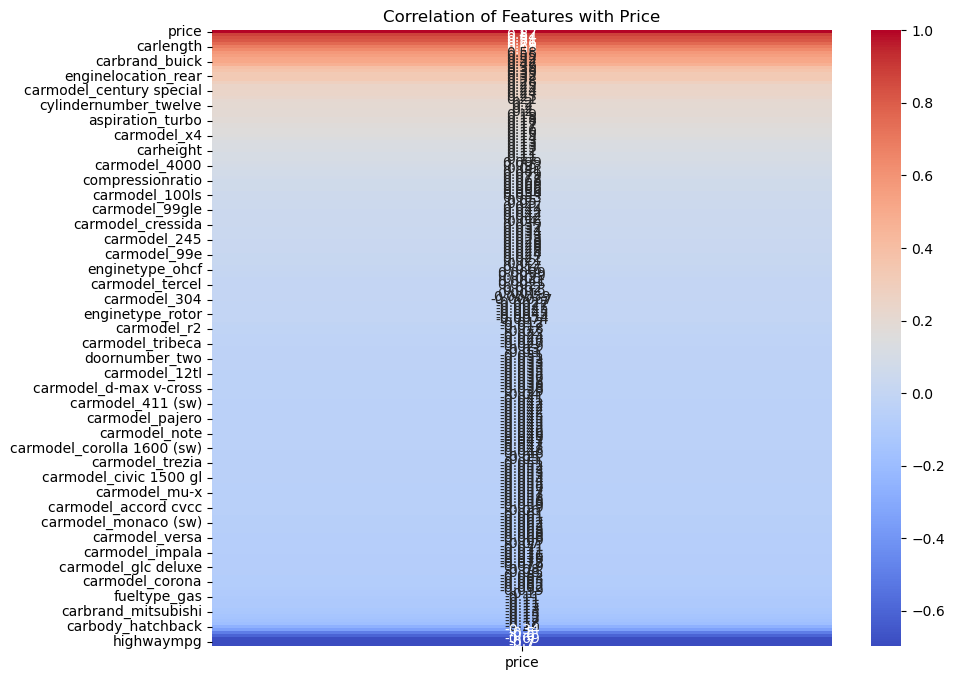

In [769]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Price")
plt.show()

| Method                  | Type         | Captures Non-Linearity | Easy to Interpret | Ideal Use Case            |
| ----------------------- | ------------ | ---------------------- | ----------------- | ------------------------- |
| Linear Coefficients     | Linear Model | No                     | Yes               | Understand direct impacts |
| Tree Feature Importance | Tree Model   | Yes                    | Yes               | Complex relationships     |
| RFE                     | Wrapper      | Yes                    | Yes               | Best subset of features   |
| Correlation Matrix      | Filter       | No                     | Yes               | Quick numeric insights    |


### 5. Hyperparameter Tuning

Hyperparameters are settings you manually choose before training a model (like number of trees in a forest, tree depth, etc.).
Hyperparameter tuning tries different combinations of these to find the best performing setup.

We’ll be using GridSearchCV, which tests all combinations of parameters using cross-validation.

**1. Import the Model and Tools**
* RandomForestRegressor: the model we’re tuning
* GridSearchCV: performs the exhaustive parameter search with cross-validation

In [771]:
from sklearn.model_selection import GridSearchCV

**2. Create the Base Model**

In [773]:
# Define the model
model_rf = RandomForestRegressor(random_state=42)

**3. Define the Search Space**

In [775]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

**4. Set Up Grid Search**

In [777]:
grid_search = GridSearchCV(estimator=model_rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

**5. Run the Search**

In [779]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

**6. Get the Best Model**

In [780]:
best_rf = grid_search.best_estimator_

**7. Make Predictions**

In [781]:
y_pred = best_rf.predict(X_test)

**8. Evaluate the Performance**

In [783]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2)
print("MSE:", mse)
print("MAE:", mae)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.95581272618503
MSE: 3488321.0666641467
MAE: 1323.7096265213786


##### This model explains 94% of the variance in car prices, with very small average errors.